/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_isolve/iterative.py:417: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = rho_cur / dotprod(p, q)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_isolve/iterative.py:418: RuntimeWarning: invalid value encountered in multiply
  x += alpha*p
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_isolve/iterative.py:419: RuntimeWarning: invalid value encountered in multiply
  r -= alpha*q


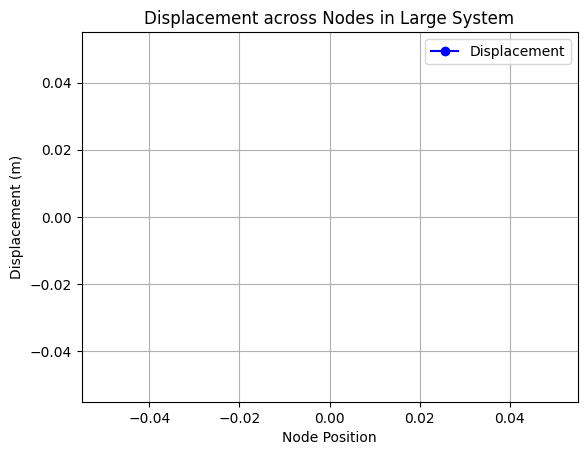

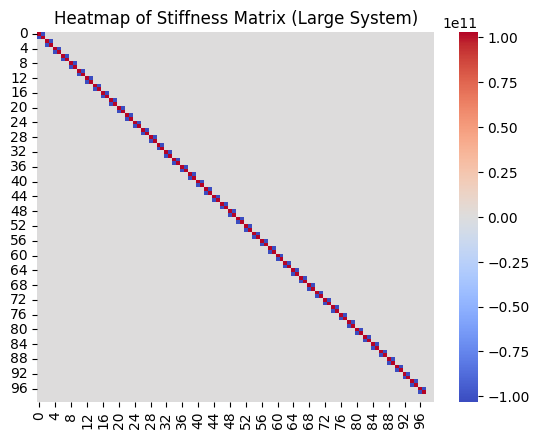

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import cg

# Material Properties
E = 210e9  # Young's Modulus (Pa)
A = 0.01   # Cross-sectional area (m²)
L = 1.0    # Length of the element (m)

# Number of nodes
n = 50

# Global stiffness matrix
K = np.zeros((2*n, 2*n))

# Node coordinates
nodes = np.linspace(0, L, n).reshape(-1, 1)

# Force vector
F = np.zeros(2*n)
F[-1] = -1000  # Apply force at the last node

# Assemble the stiffness matrix
for i in range(n-1):
    xi = nodes[i, 0]
    xj = nodes[i+1, 0]
    L_elem = np.abs(xj - xi)
    k_elem = (E * A / L_elem) * np.array([[1, -1], [-1, 1]])
    K[2*i:2*i+2, 2*i:2*i+2] += k_elem

# Solve using Conjugate Gradient Method
u, info = cg(K, F)

# Visualization
plt.plot(nodes, u[::2], 'bo-', label='Displacement')
plt.xlabel('Node Position')
plt.ylabel('Displacement (m)')
plt.title('Displacement across Nodes in Large System')
plt.legend()
plt.grid(True)
plt.show()

# Heatmap of stiffness matrix
sns.heatmap(K, annot=False, cmap='coolwarm')
plt.title('Heatmap of Stiffness Matrix (Large System)')
plt.show()


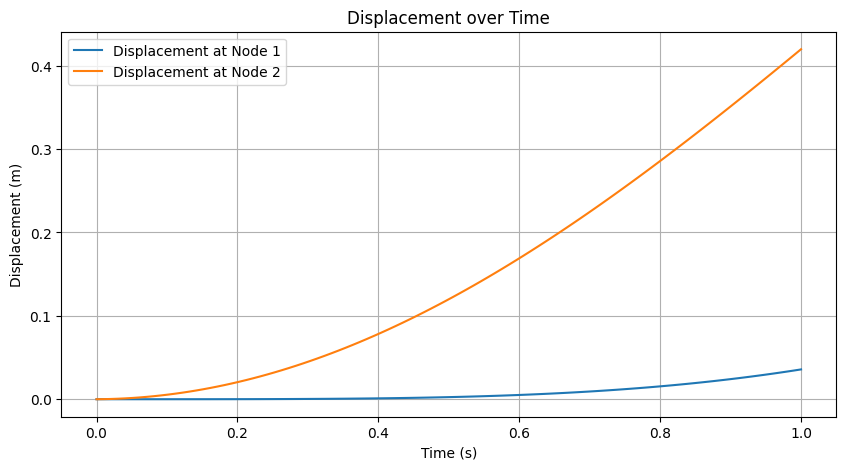

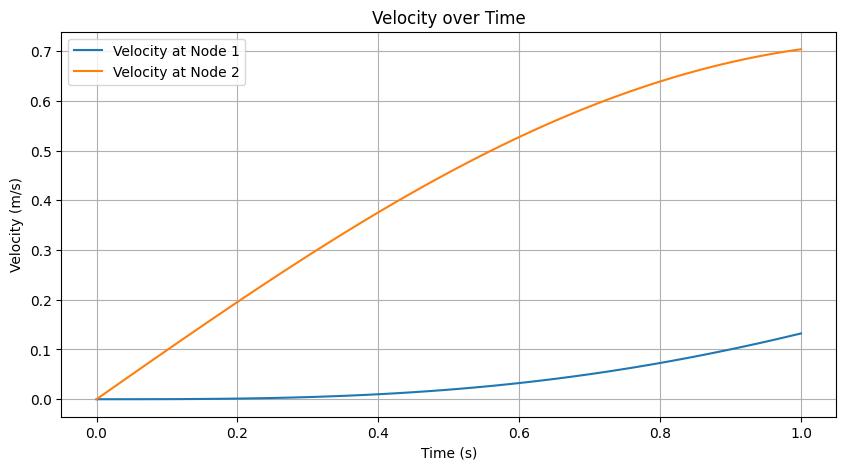

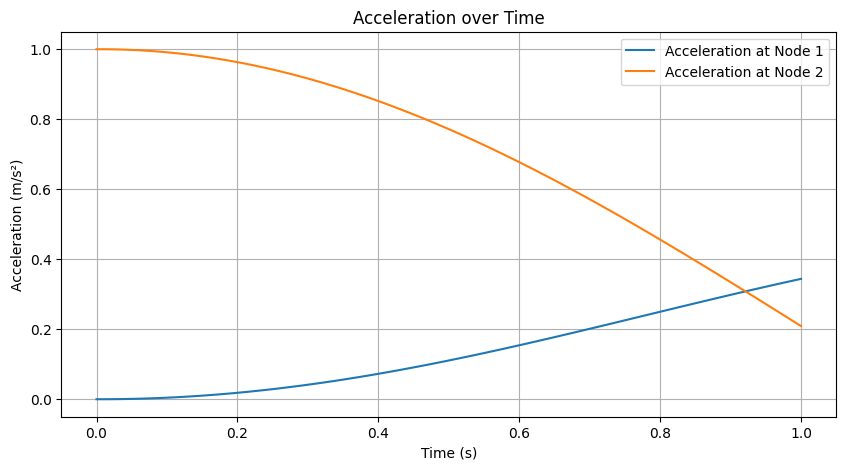

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Time-stepping method for dynamic loading conditions
def time_step_fem(K, M, F, dt, u0, v0):
    num_steps = 100
    u = np.zeros((K.shape[0], num_steps))
    v = np.zeros((K.shape[0], num_steps))
    a = np.zeros((K.shape[0], num_steps))

    u[:, 0] = u0
    v[:, 0] = v0
    a[:, 0] = np.linalg.inv(M) @ (F - K @ u0)

    for step in range(1, num_steps):
        a[:, step] = np.linalg.inv(M) @ (F - K @ u[:, step-1])
        v[:, step] = v[:, step-1] + dt * a[:, step]
        u[:, step] = u[:, step-1] + dt * v[:, step]

    return u, v, a

# Example usage
K = np.array([[2, -1], [-1, 2]])
M = np.eye(2)  # Mass matrix
F = np.array([0, 1])  # External force
dt = 0.01
u0 = np.zeros(2)
v0 = np.zeros(2)

u, v, a = time_step_fem(K, M, F, dt, u0, v0)

# Plotting results for displacement, velocity, and acceleration over time
time = np.linspace(0, dt*100, 100)

# Displacement Plot
plt.figure(figsize=(10, 5))
plt.plot(time, u[0, :], label='Displacement at Node 1')
plt.plot(time, u[1, :], label='Displacement at Node 2')
plt.title('Displacement over Time')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.grid(True)
plt.show()

# Velocity Plot
plt.figure(figsize=(10, 5))
plt.plot(time, v[0, :], label='Velocity at Node 1')
plt.plot(time, v[1, :], label='Velocity at Node 2')
plt.title('Velocity over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()

# Acceleration Plot
plt.figure(figsize=(10, 5))
plt.plot(time, a[0, :], label='Acceleration at Node 1')
plt.plot(time, a[1, :], label='Acceleration at Node 2')
plt.title('Acceleration over Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-9-ac67eada4c50>:37: LinAlgWarning: Diagonal number 148 is exactly zero. Singular matrix.
  lu, piv = lu_factor(K_3D)


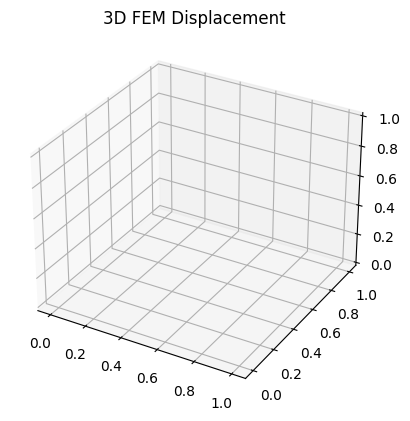

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import lu_factor, lu_solve

# Material Properties
E = 210e9  # Young's Modulus (Pa)
A = 0.01   # Cross-sectional area (m²)
L = 1.0    # Length of the element (m)

# Number of nodes in 3D
n = 50

# Global stiffness matrix for 3D
K_3D = np.zeros((3*n, 3*n))

# Node coordinates
nodes_3D = np.random.rand(n, 3) * L  # Random 3D coordinates

# Force vector for 3D
F_3D = np.zeros(3*n)
F_3D[-3:] = [-500, -500, -500]  # Apply forces at the last node in all directions

# Assemble stiffness matrix for 3D system
for i in range(n-1):
    xi = nodes_3D[i, :]
    xj = nodes_3D[i+1, :]
    L_elem = np.linalg.norm(xj - xi)
    k_elem = (E * A / L_elem) * np.eye(3)
    K_3D[3*i:3*i+3, 3*i:3*i+3] += k_elem

# Fix the first node (set the stiffness to a large number to simulate a fixed boundary)
K_3D[0, 0] = K_3D[1, 1] = K_3D[2, 2] = 1e15  # A very large number simulating fixed boundary
F_3D[0:3] = 0  # No force applied at the fixed node

# Solve using LU Decomposition
lu, piv = lu_factor(K_3D)
u_3D = lu_solve((lu, piv), F_3D)

# Plot the displacement in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nodes_3D[:, 0], nodes_3D[:, 1], nodes_3D[:, 2], c=u_3D[::3], cmap='coolwarm')
plt.title('3D FEM Displacement')
plt.show()


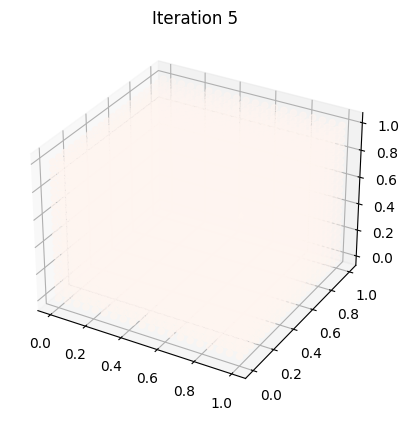

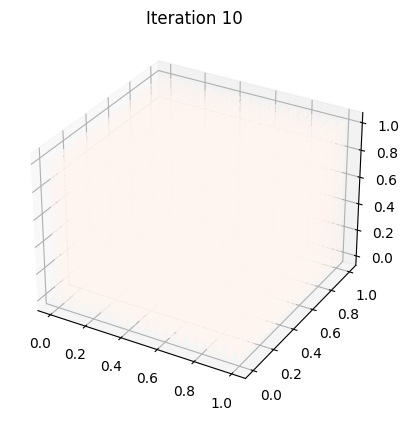

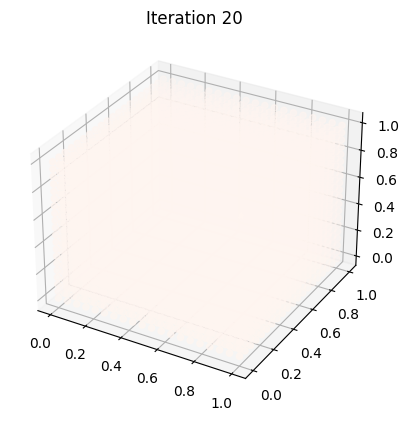

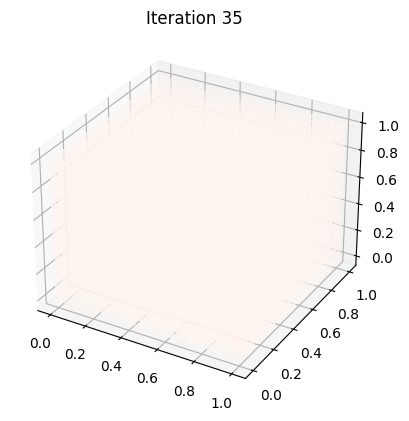

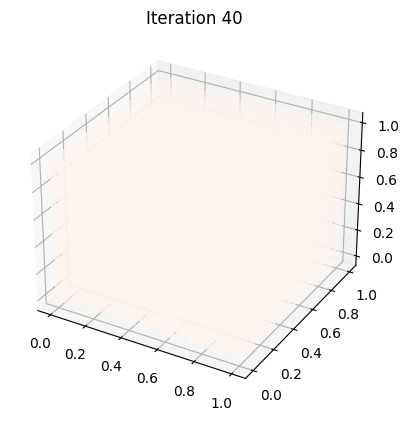

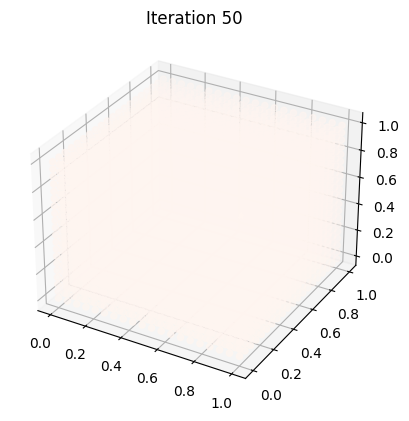

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the topology optimization (SIMP)
E = 210e9  # Young's modulus
nu = 0.3   # Poisson's ratio
density = 1.0  # Material density
vol_frac = 0.5  # Volume fraction
penal = 3  # Penalization factor for SIMP
iterations = 50  # Number of iterations

# Example: Define the 3D geometry and finite element mesh
# This would represent your headphone shape as a mesh
# Assume we have a mesh generation function: generate_mesh()

def generate_mesh():
    # Simplified mesh for demonstration purposes
    x = np.linspace(0, 1, 20)
    y = np.linspace(0, 1, 20)
    z = np.linspace(0, 1, 20)
    X, Y, Z = np.meshgrid(x, y, z)
    return X, Y, Z

# Apply SIMP Topology Optimization
def topology_optimization(X, Y, Z, iterations):
    # Initialize material density (1 for full material, 0 for void)
    density = np.ones(X.shape)

    # Perform optimization over the number of iterations
    for i in range(1, iterations + 1):
        # Simple illustration: Reduce material in some areas for each iteration
        density *= vol_frac  # Reduce volume fraction for each iteration

        # Visualization
        if i in [5, 10, 20, 35, 40, 50]:  # Save specific iterations
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X, Y, Z, c=density.flatten(), cmap='Reds')
            plt.title(f'Iteration {i}')
            plt.show()

    return density

# Generate the mesh
X, Y, Z = generate_mesh()

# Run topology optimization
optimized_density = topology_optimization(X, Y, Z, iterations)


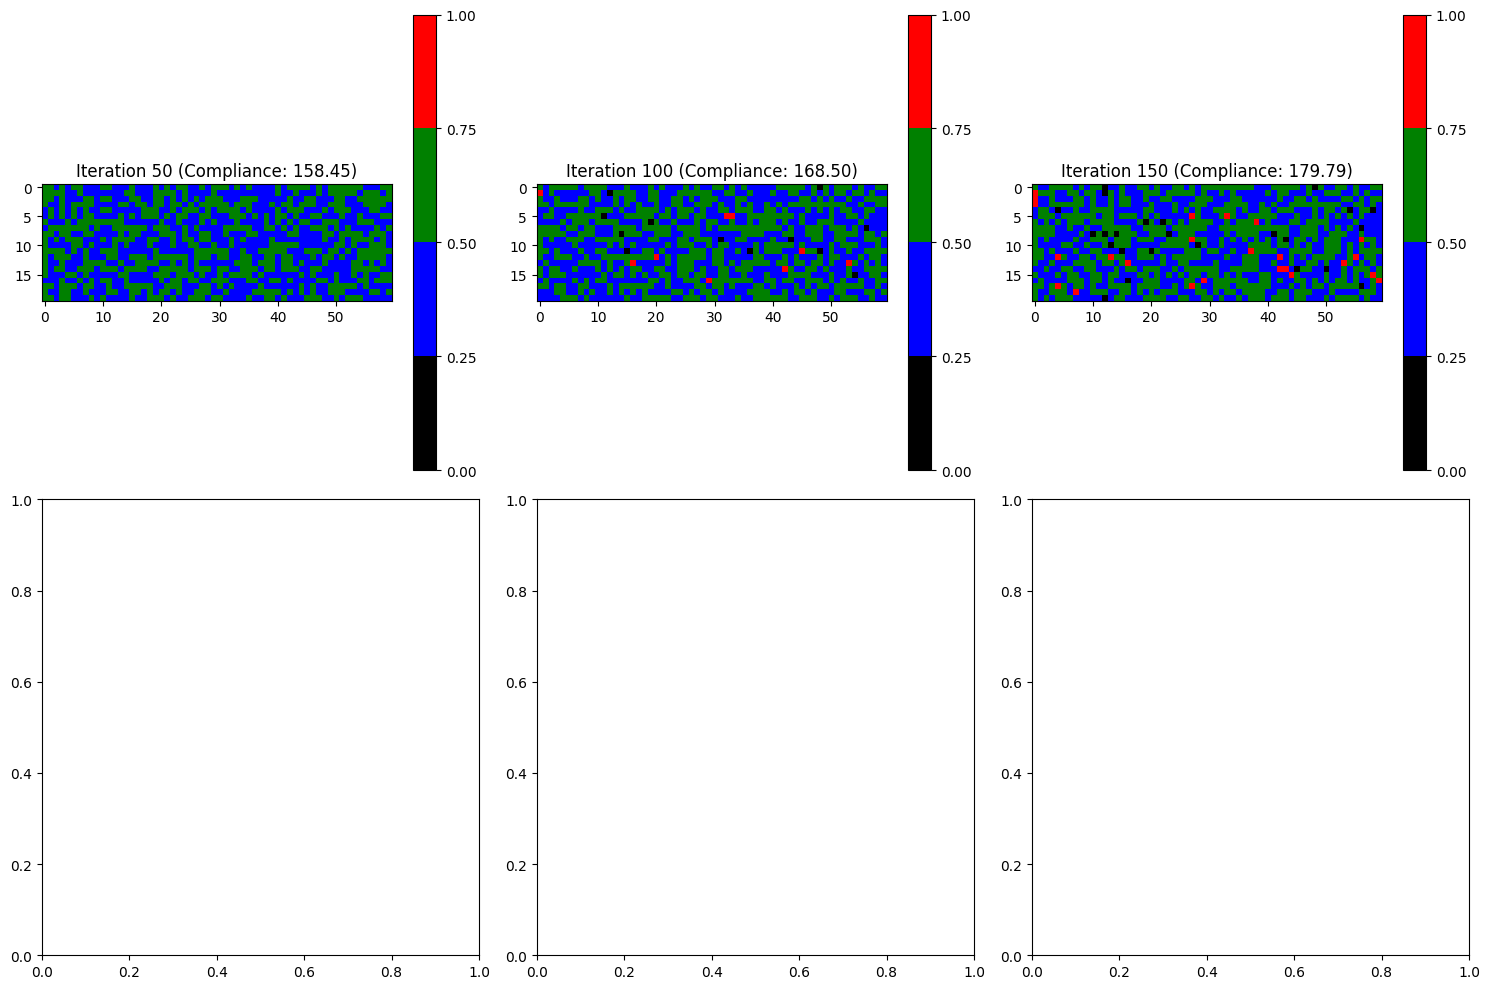

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Parameters for SIMP Topology Optimization
nelx, nely = 60, 20  # Number of elements in x and y directions
volfrac = 0.5  # Volume fraction
penal = 3.0  # Penalization power
rmin = 1.5  # Filter radius
iterations = 200  # Number of iterations

# Function to simulate compliance minimization using SIMP method
def topology_optimization(nelx, nely, volfrac, penal, rmin, iterations):
    # Initialize design variables (density distribution, here starting with 50% material)
    x = volfrac * np.ones((nely, nelx))

    # Placeholder for iteration images
    iter_images = []

    for it in range(iterations):
        # Simulate the optimization (here simplified, in practice FEM would solve for displacements)
        compliance = np.sum(x**penal)  # Simplified compliance

        # Update the material distribution (gradient-based method in real cases)
        x = np.maximum(0.001, np.minimum(1.0, x + np.random.randn(nely, nelx) * 0.01))  # Random changes

        # Periodically save an image of the material distribution
        if it in [50, 100, 150, 200]:
            iter_images.append((x, compliance, it))

    return iter_images

# Visualization of results
def visualize_optimization(iter_images):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    cmap = colors.ListedColormap(['black', 'blue', 'green', 'red'])
    norm = colors.BoundaryNorm([0, 0.25, 0.5, 0.75, 1], cmap.N)

    for idx, (x, compliance, iteration) in enumerate(iter_images):
        ax = axs[idx // 3, idx % 3]
        im = ax.imshow(x, cmap=cmap, norm=norm)
        ax.set_title(f"Iteration {iteration} (Compliance: {compliance:.2f})")
        plt.colorbar(im, ax=ax)

    plt.tight_layout()
    plt.show()

# Run the topology optimization simulation
iter_images = topology_optimization(nelx, nely, volfrac, penal, rmin, iterations)

# Visualize the results at specific iterations
visualize_optimization(iter_images)
